In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_MBS.csv') 

In [5]:
df.head()

,Date,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.350365,0.717929,0.725832,0.630776,0.712547,0.745522,0.677576,0.708116,0.592760,0.694897,0.492488,0.570117,0.253638,0.747463,0.551875,4.0
1,1997-02-28 00:00:00,0.313869,0.637829,0.558983,0.601489,0.639215,0.562434,0.410301,0.594846,0.455540,0.589623,0.389947,0.540783,0.202642,0.541103,0.473883,4.0
2,1997-03-31 00:00:00,0.372263,0.375000,0.589971,0.562439,0.615111,0.556375,0.547829,0.525178,0.408284,0.592410,0.436515,0.586204,0.353999,0.529601,0.467643,4.0
3,1997-04-30 00:00:00,0.335766,0.661608,0.586265,0.667873,0.547397,0.599052,0.451645,0.602666,0.365778,0.632933,0.420977,0.645439,0.352820,0.409844,0.422184,4.0
4,1997-05-31 00:00:00,0.328467,0.562735,0.513109,0.470997,0.240147,0.496839,0.336672,0.507642,0.286514,0.609563,0.413176,0.607589,0.350575,0.398342,0.441813,4.0


In [6]:
df = df.drop(columns=[#"Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.501295,0.493999,0.497352,0.489545,0.495918,0.503700,0.504949,0.512186,0.511790,0.495789,0.445458,0.497647,0.458988,2.55914
std,0.201425,0.207990,0.210104,0.218887,0.209323,0.219842,0.208194,0.221212,0.200958,0.224305,0.213694,0.242868,0.201318,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.343066,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.292076,0.375000,0.326409,2.00000
50%,0.467153,0.511023,0.511976,0.501054,0.512001,0.509064,0.532947,0.510077,0.536752,0.502933,0.461649,0.466678,0.450613,3.00000
75%,0.605839,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.575246,0.625000,0.595845,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               234 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.7229927004999999


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.813764,0.476495,0.533606,0.480634,0.571698,0.454601,0.606441,0.455905,0.637516,0.543795,0.507344,0.600942,0.408982,2.914286
std,0.068938,0.249770,0.148656,0.254667,0.203313,0.238157,0.197884,0.253905,0.209252,0.213782,0.244870,0.210849,0.187991,1.067472
min,0.729927,0.000000,0.250650,0.000000,0.000000,0.000000,0.105918,0.000000,0.138405,0.001798,0.000000,0.277909,0.000000,1.000000
25%,0.751825,0.360356,0.437781,0.324157,0.467070,0.341055,0.503470,0.336728,0.518224,0.422502,0.331186,0.441982,0.293571,2.000000
50%,0.795620,0.492475,0.565307,0.484194,0.548210,0.455273,0.596124,0.498499,0.616639,0.561033,0.502321,0.542794,0.356228,3.000000
75%,0.879562,0.612065,0.632255,0.625790,0.674471,0.598045,0.692196,0.563250,0.698340,0.663134,0.714209,0.724882,0.587021,4.000000
max,0.978102,1.000000,0.770013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.957096,1.000000,0.718504,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 3-mo (Treasury)  35.0  0.476495  0.249770  0.042219   
 2                         combined  70.0  0.645129  0.248862  0.029745   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.390696  0.562294  
 2   0.585791  0.704468  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.3373
 1                              Degrees of freedom =   68.0000
 2                                               t =    7.7007
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.8408
 7                                       Hedge's g =    1.8204
 8                        

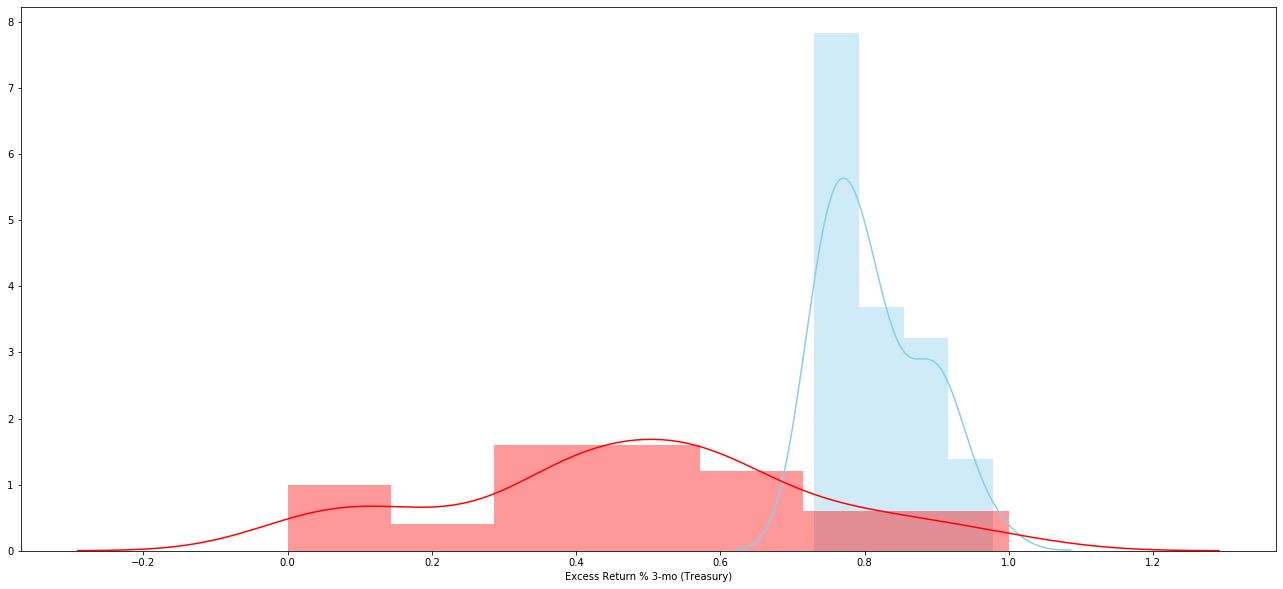

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 3-mo (Agg)  35.0  0.533606  0.148656  0.025128   0.482541   
 2                    combined  70.0  0.673685  0.182037  0.021758   0.630280   
 
    Interval  
 0  0.837445  
 1  0.584672  
 2  0.717091  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2802
 1                             Degrees of freedom =   68.0000
 2                                              t =   10.1148
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    2.4179
 7                                      Hedge's g =    2.3911
 8                                  Glass's delta =    

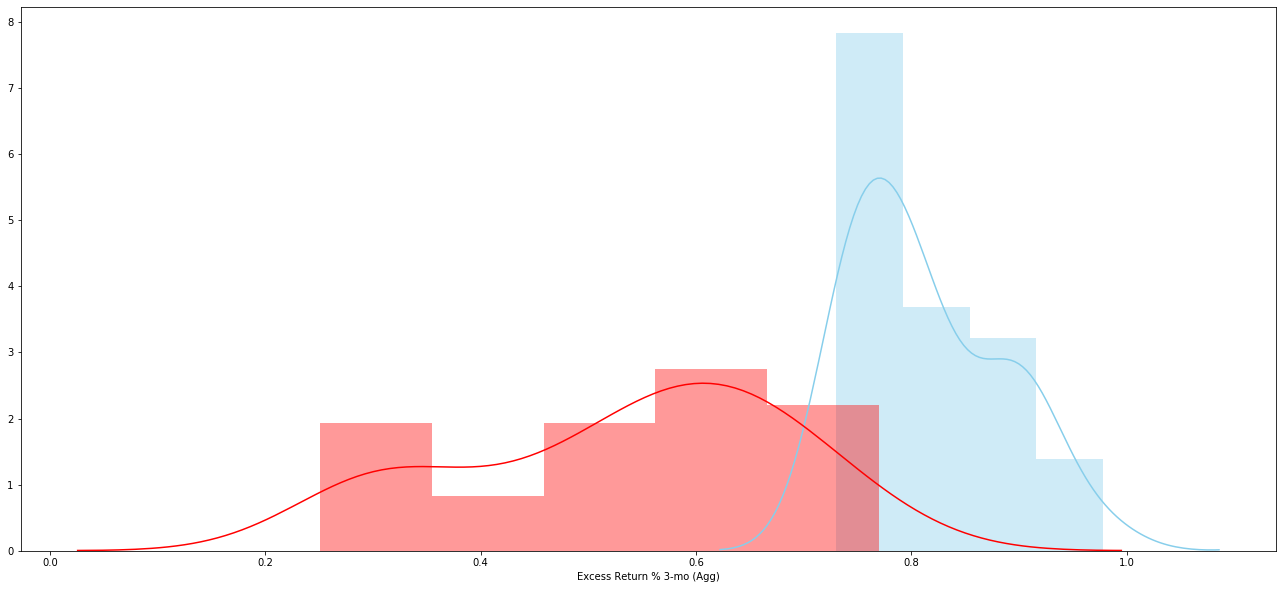

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 6-mo (Treasury)  35.0  0.480634  0.254667  0.043047   
 2                         combined  70.0  0.647199  0.249891  0.029868   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.393152  0.568115  
 2   0.587615  0.706783  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.3331
 1                              Degrees of freedom =   68.0000
 2                                               t =    7.4700
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7857
 7                                       Hedge's g =    1.7659
 8                        

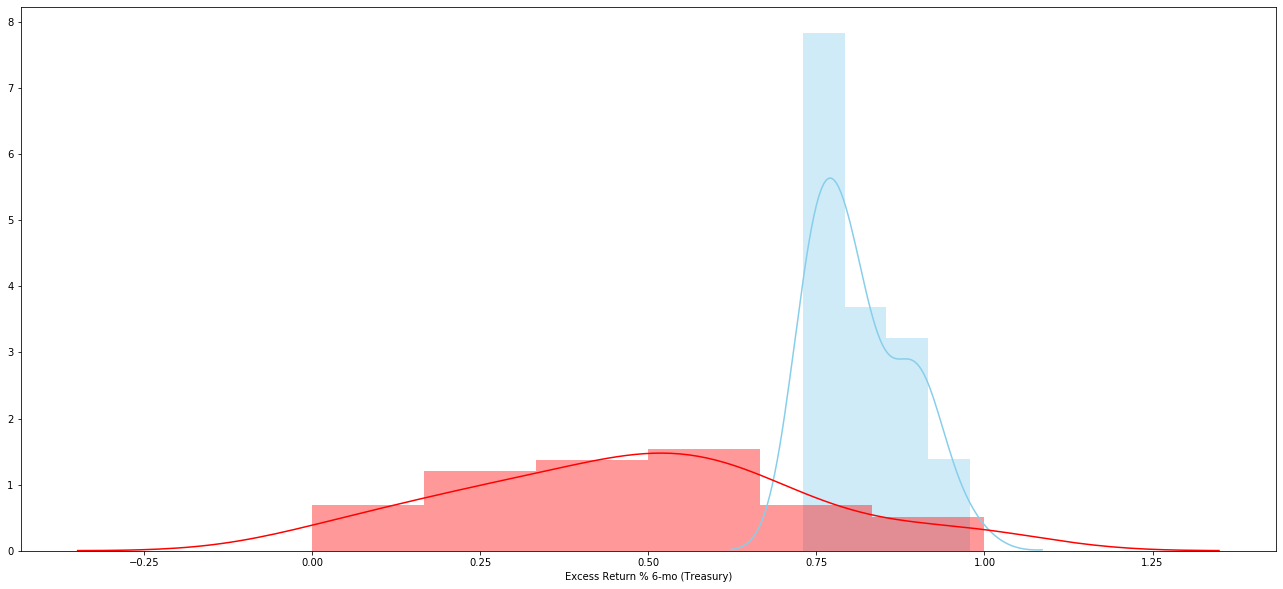

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 6-mo (Agg)  35.0  0.571698  0.203313  0.034366   0.501858   
 2                    combined  70.0  0.692731  0.193834  0.023168   0.646513   
 
    Interval  
 0  0.837445  
 1  0.641539  
 2  0.738949  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.2421
 1                             Degrees of freedom =   68.0000
 2                                              t =    6.6707
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.5946
 7                                      Hedge's g =    1.5769
 8                                  Glass's delta =    

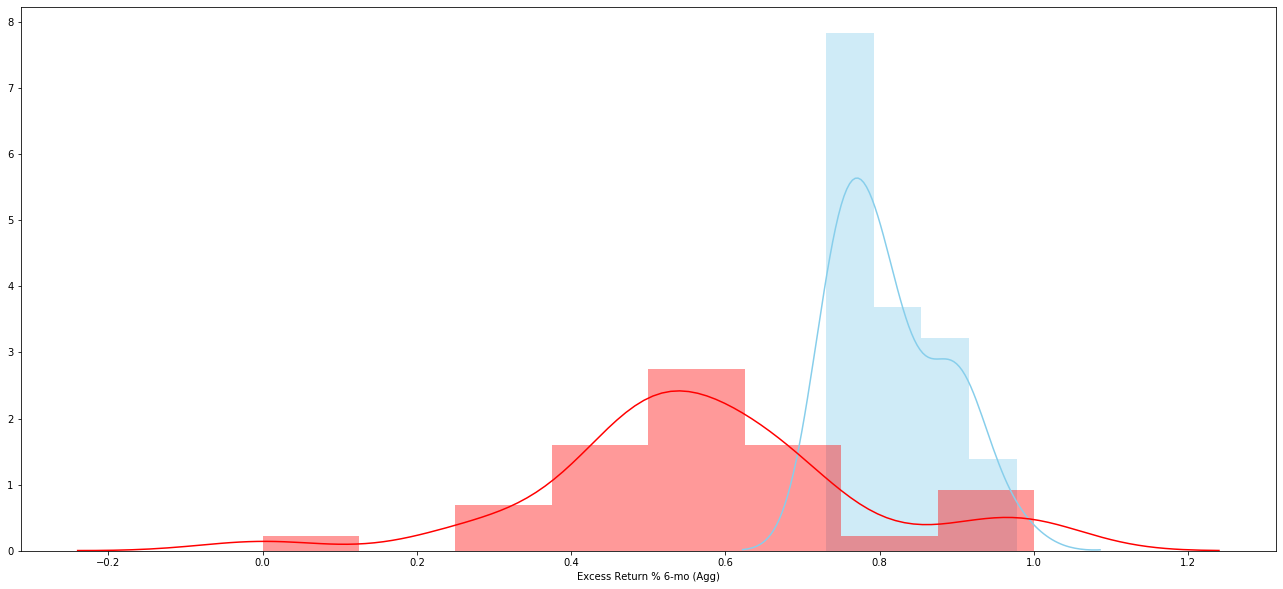

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 9-mo (Treasury)  35.0  0.454601  0.238157  0.040256   
 2                         combined  70.0  0.634182  0.251012  0.030002   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.372791  0.536410  
 2   0.574331  0.694034  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.3592
 1                              Degrees of freedom =   68.0000
 2                                               t =    8.5702
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    2.0487
 7                                       Hedge's g =    2.0260
 8                        

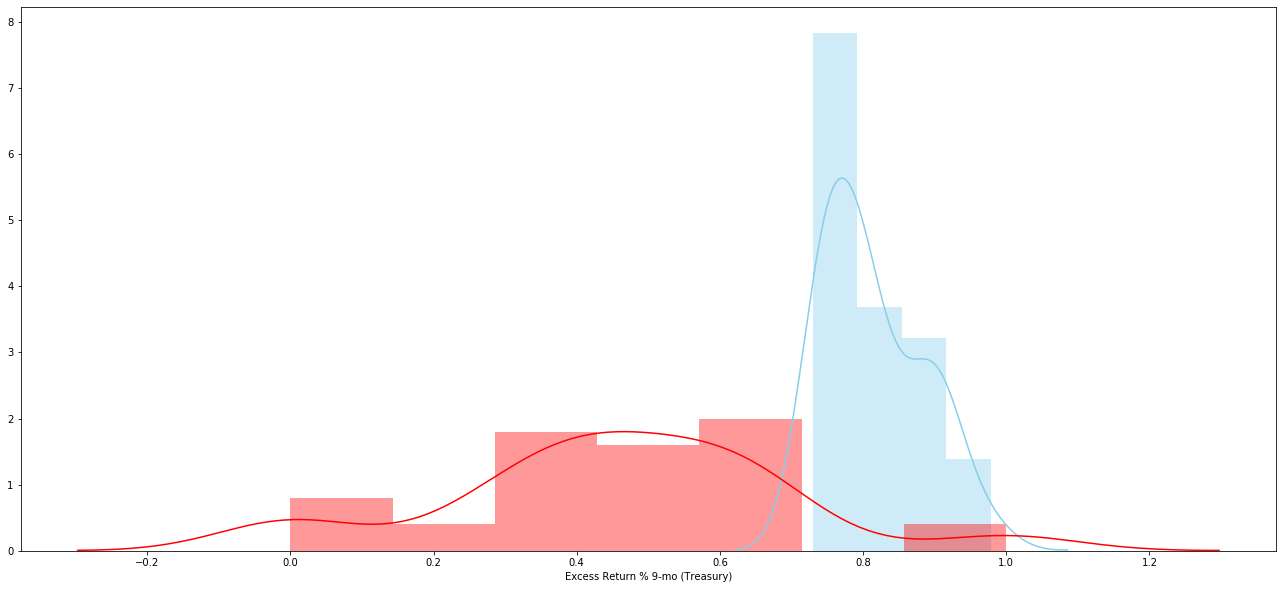

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 9-mo (Agg)  35.0  0.606441  0.197884  0.033449   0.538466   
 2                    combined  70.0  0.710103  0.180385  0.021560   0.667092   
 
    Interval  
 0  0.837445  
 1  0.674417  
 2  0.753114  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2073
 1                             Degrees of freedom =   68.0000
 2                                              t =    5.8532
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.3992
 7                                      Hedge's g =    1.3837
 8                                  Glass's delta =    

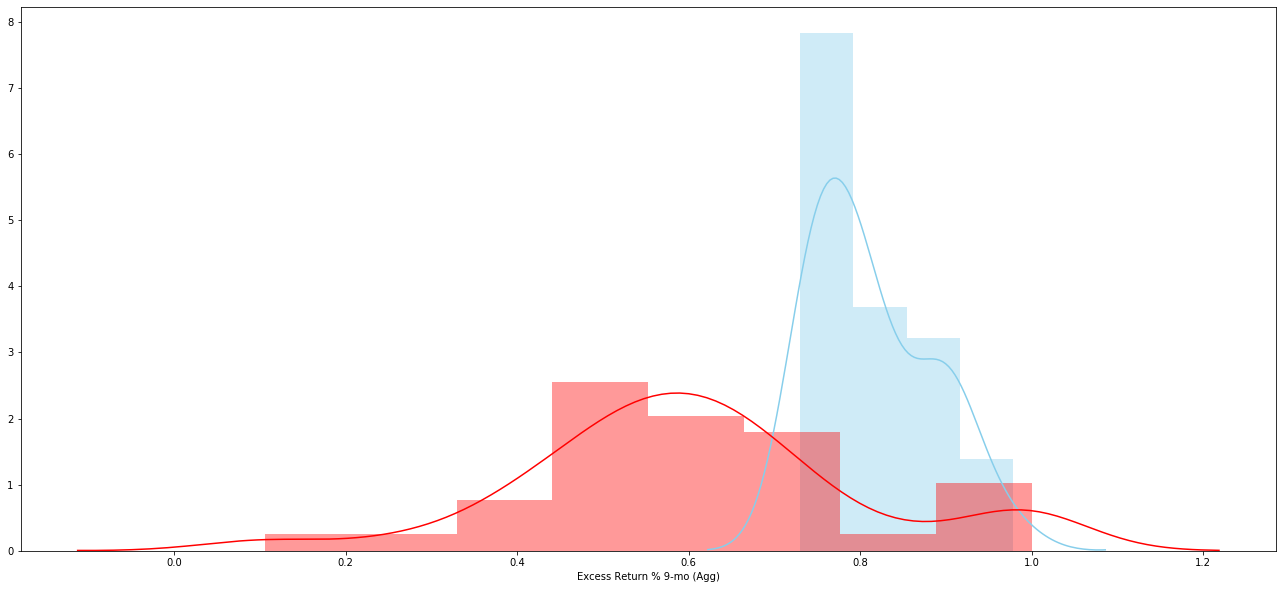

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 12-mo (Treasury)  35.0  0.455905  0.253905  0.042918   
 2                          combined  70.0  0.634835  0.258047  0.030842   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.368686  0.543125  
 2   0.573306  0.696364  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.3579
 1                              Degrees of freedom =   68.0000
 2                                               t =    8.0469
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.9236
 7                                       Hedge's g =    1.9023
 8                    

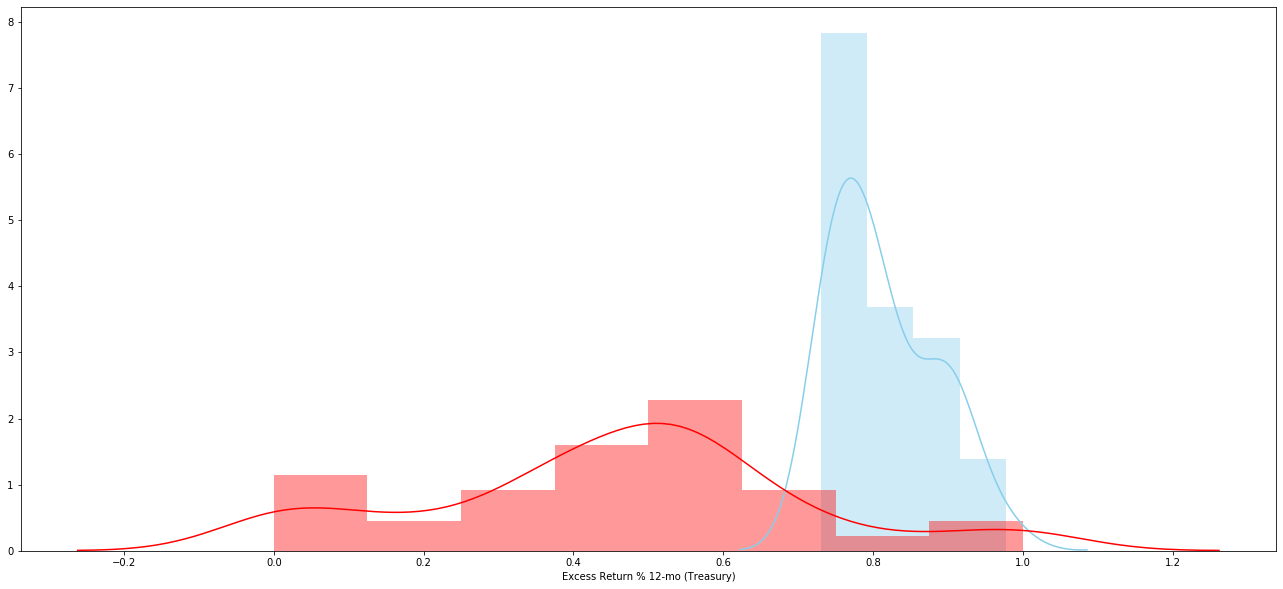

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 12-mo (Agg)  35.0  0.637516  0.209252  0.035370   0.565635   
 2                     combined  70.0  0.725640  0.178315  0.021313   0.683122   
 
    Interval  
 0  0.837445  
 1  0.709396  
 2  0.768158  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1762
 1                              Degrees of freedom =   68.0000
 2                                               t =    4.7328
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1313
 7                                       Hedge's g =    1.1188
 8                                   Glass

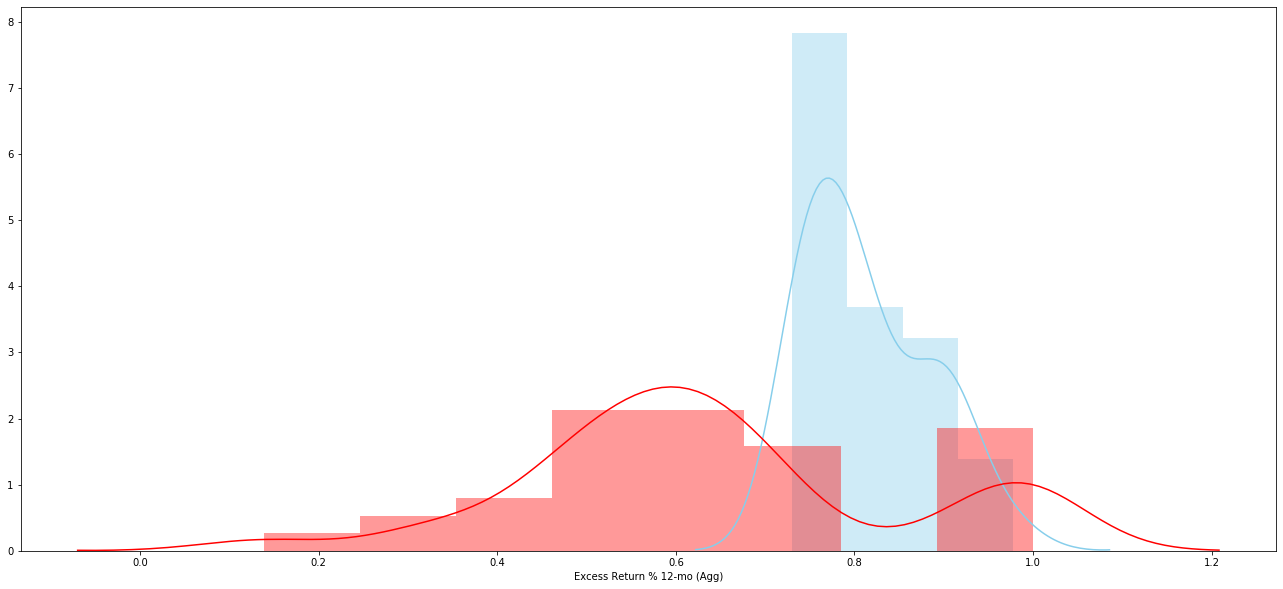

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 24-mo (Treasury)  35.0  0.543795  0.213782  0.036136   
 2                          combined  70.0  0.678780  0.208199  0.024885   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.470359  0.617232  
 2   0.629137  0.728423  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2700
 1                              Degrees of freedom =   68.0000
 2                                               t =    7.1104
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6997
 7                                       Hedge's g =    1.6809
 8                    

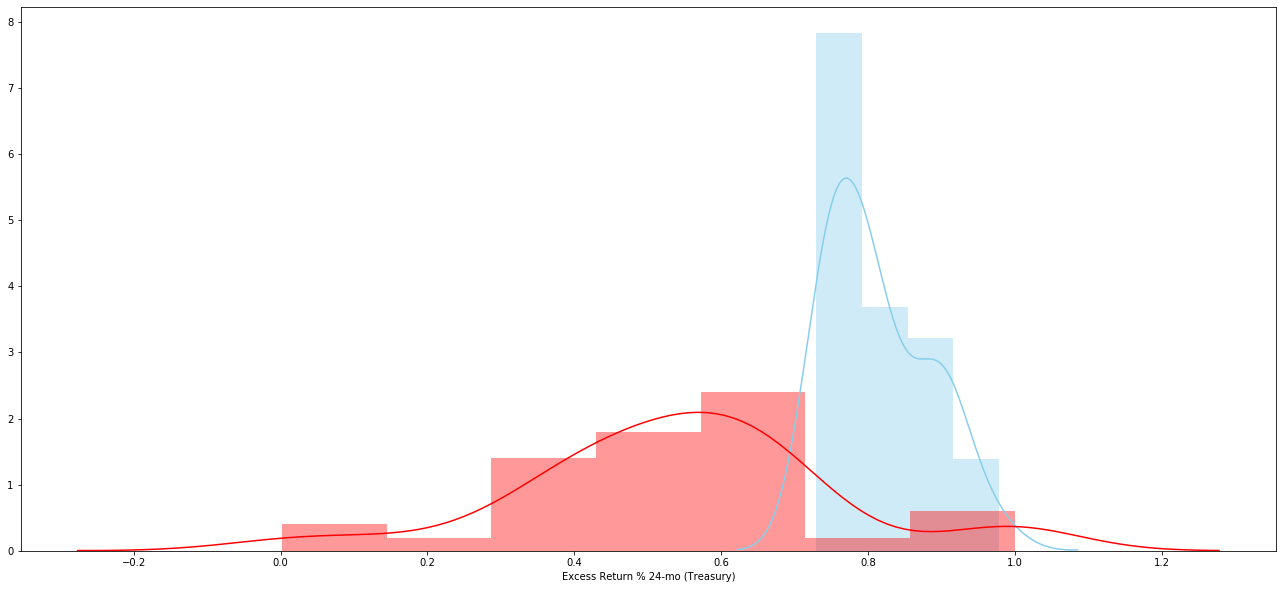

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 24-mo (Agg)  35.0  0.507344  0.244870  0.041391   0.423228   
 2                     combined  70.0  0.660554  0.236012  0.028209   0.604279   
 
    Interval  
 0  0.837445  
 1  0.591460  
 2  0.716829  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.3064
 1                              Degrees of freedom =   68.0000
 2                                               t =    7.1261
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7035
 7                                       Hedge's g =    1.6846
 8                                   Glass

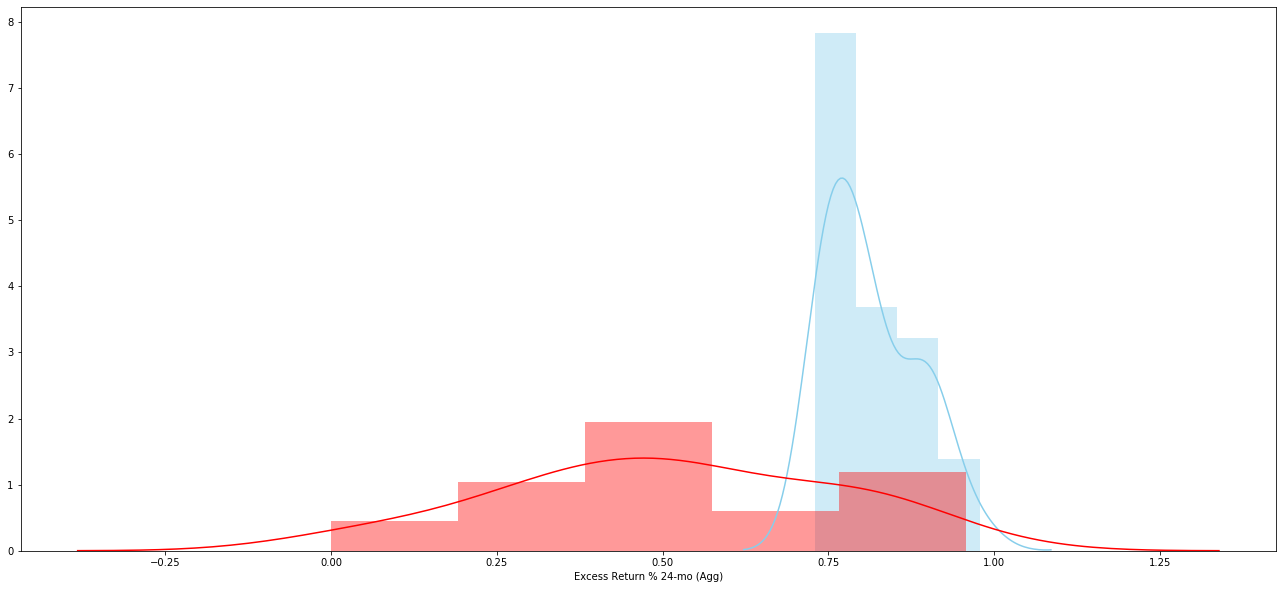

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 36-mo (Treasury)  35.0  0.600942  0.210849  0.035640   
 2                          combined  70.0  0.707353  0.189039  0.022594   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.528513  0.673372  
 2   0.662279  0.752428  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.2128
 1                              Degrees of freedom =   68.0000
 2                                               t =    5.6758
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3568
 7                                       Hedge's g =    1.3417
 8                    

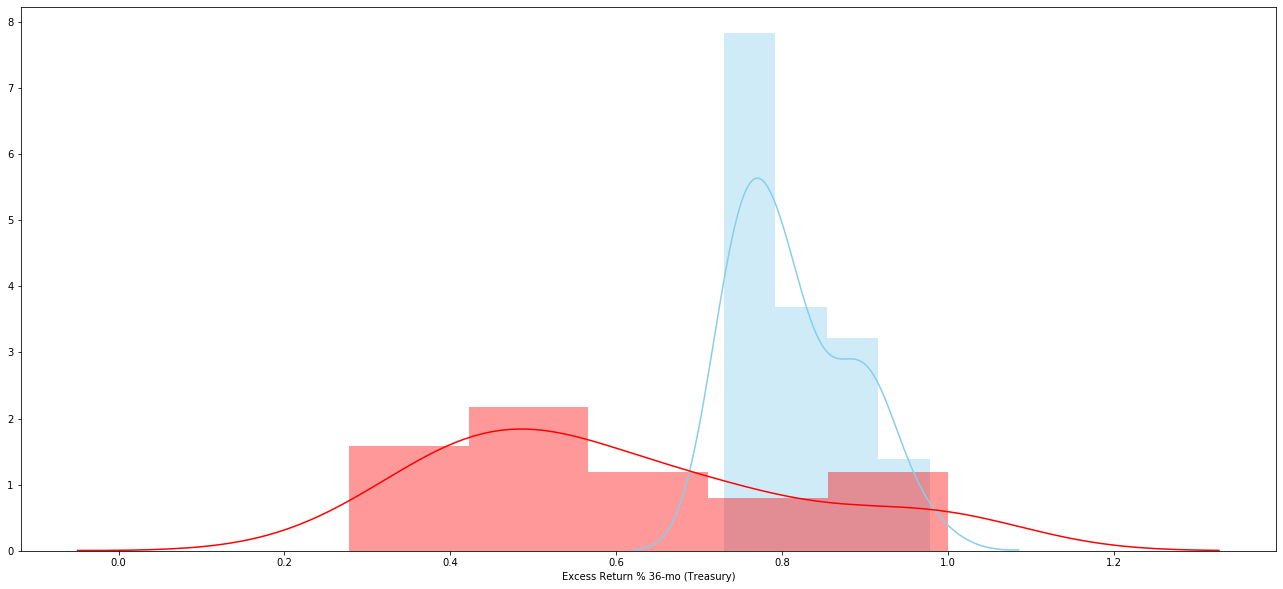

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 36-mo (Agg)  35.0  0.408982  0.187991  0.031776   0.344405   
 2                     combined  70.0  0.611373  0.247612  0.029595   0.552332   
 
    Interval  
 0  0.837445  
 1  0.473559  
 2  0.670414  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.4048
 1                              Degrees of freedom =   68.0000
 2                                               t =   11.9597
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    2.8589
 7                                       Hedge's g =    2.8273
 8                                   Glass

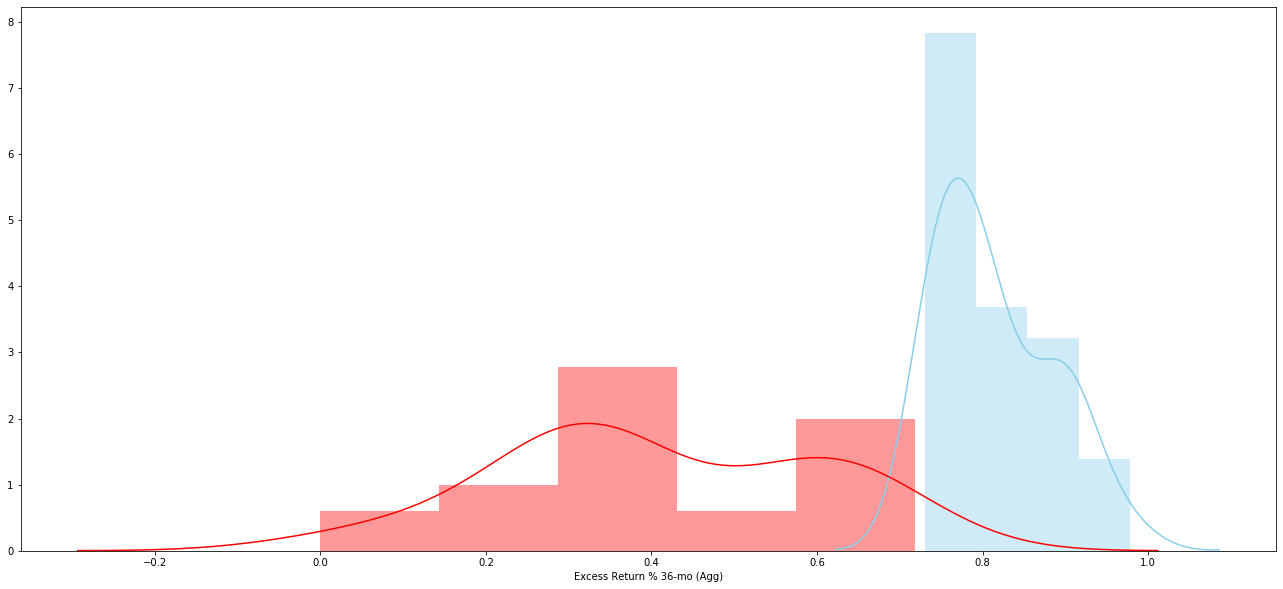

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_MBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,278.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.501295,0.491995,0.494670,0.493999,0.497352,0.489545,0.495918,0.503700,0.504949,0.512186,0.511790,0.495789,0.445458,0.497647,0.458988,2.55914
std,0.201425,0.212702,0.222768,0.207990,0.210104,0.218887,0.209323,0.219842,0.208194,0.221212,0.200958,0.224305,0.213694,0.242868,0.201318,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.343066,0.375000,0.374848,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.292076,0.375000,0.326409,2.00000
50%,0.467153,0.513924,0.509160,0.511023,0.511976,0.501054,0.512001,0.509064,0.532947,0.510077,0.536752,0.502933,0.461649,0.466678,0.450613,3.00000
75%,0.605839,0.625000,0.620595,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.575246,0.625000,0.595845,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 3-mo (Treasury)  278.0  0.493999  0.207990  0.012474   
 2                         combined  313.0  0.529755  0.221614  0.012526   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.469442  0.518556  
 2   0.505109  0.554402  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.3198
 1                              Degrees of freedom =   311.0000
 2                                               t =     9.0220
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6182
 7                                       Hedge's g =     1.6143
 8           

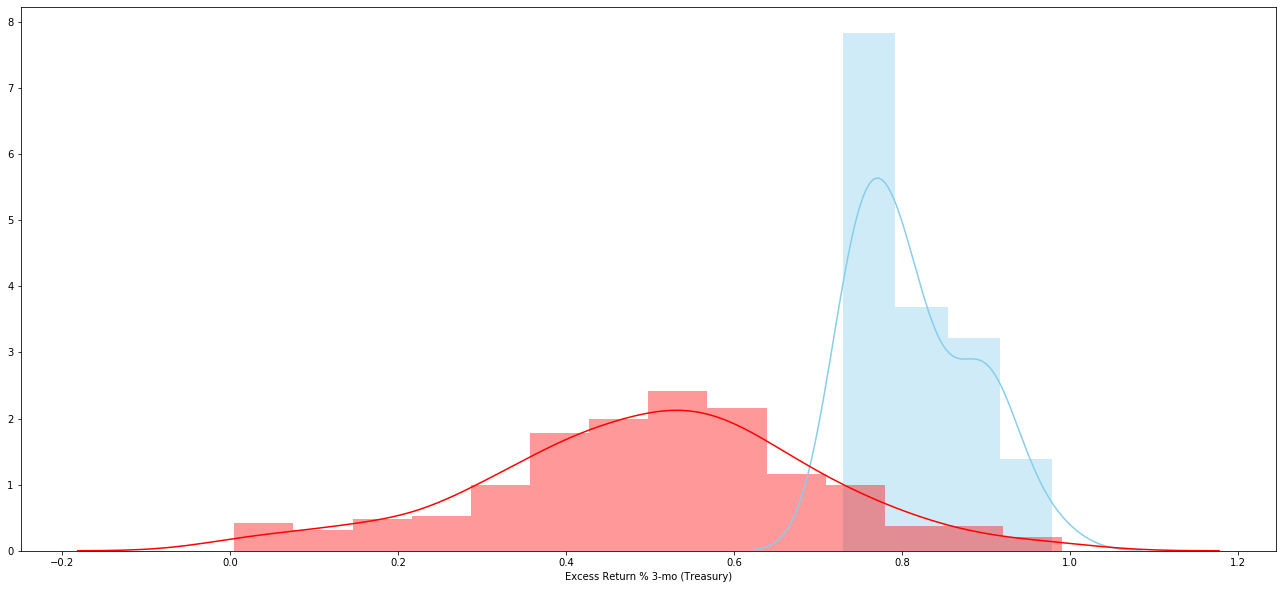

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 3-mo (Agg)  278.0  0.497352  0.210104  0.012601   0.472546   
 2                    combined  313.0  0.532734  0.222901  0.012599   0.507944   
 
    Interval  
 0  0.837445  
 1  0.522159  
 2  0.557524  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.3164
 1                             Degrees of freedom =   311.0000
 2                                              t =     8.8388
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5853
 7                                      Hedge's g =     1.5815
 8                                  Glass'

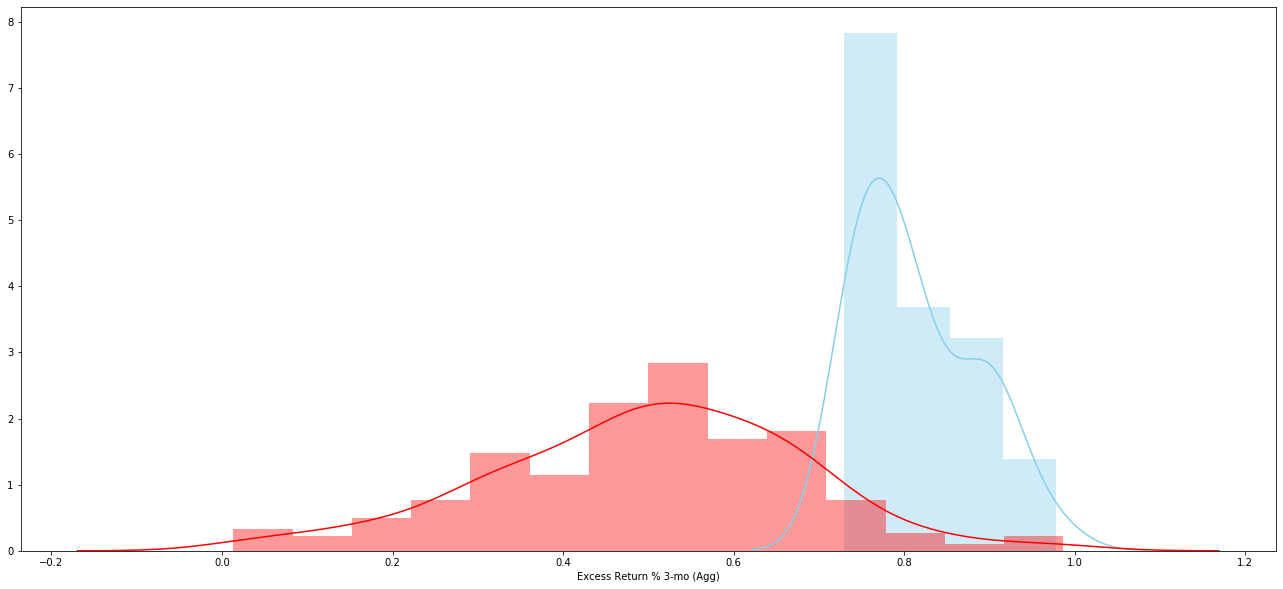

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 6-mo (Treasury)  275.0  0.489545  0.218887  0.013199   
 2                         combined  310.0  0.526150  0.231452  0.013146   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.463560  0.515530  
 2   0.500284  0.552017  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.3242
 1                              Degrees of freedom =   308.0000
 2                                               t =     8.6972
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5609
 7                                       Hedge's g =     1.5571
 8           

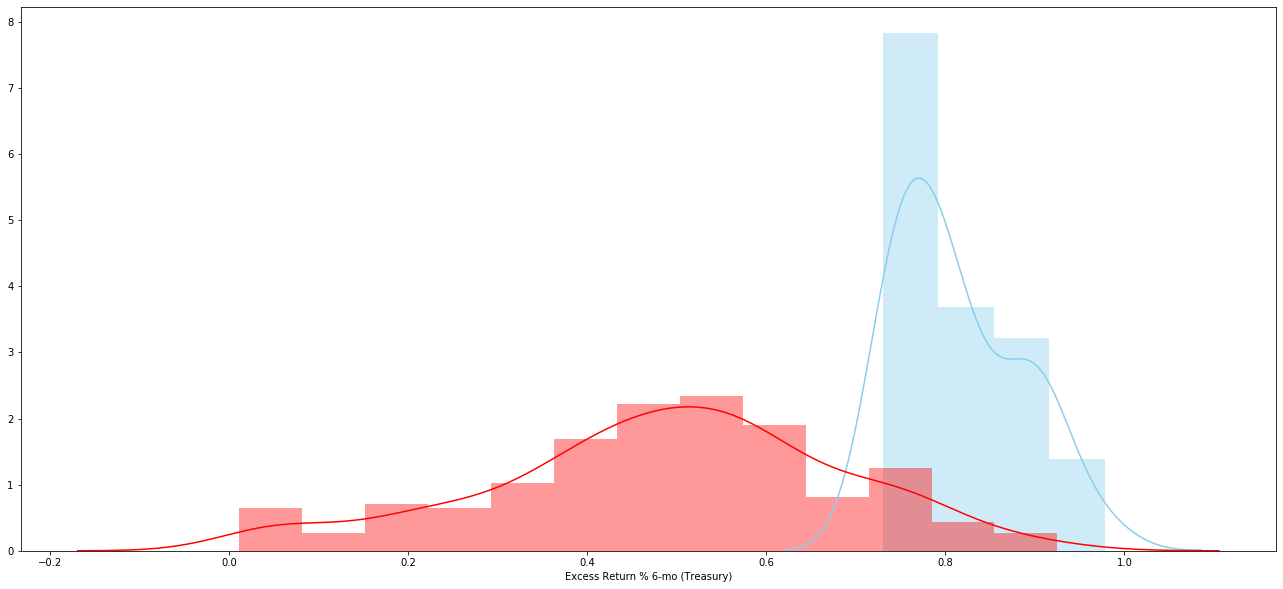

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 6-mo (Agg)  275.0  0.495918  0.209323  0.012623   0.471068   
 2                    combined  310.0  0.531804  0.222547  0.012640   0.506933   
 
    Interval  
 0  0.837445  
 1  0.520768  
 2  0.556675  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.3178
 1                             Degrees of freedom =   308.0000
 2                                              t =     8.9108
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5992
 7                                      Hedge's g =     1.5953
 8                                  Glass'

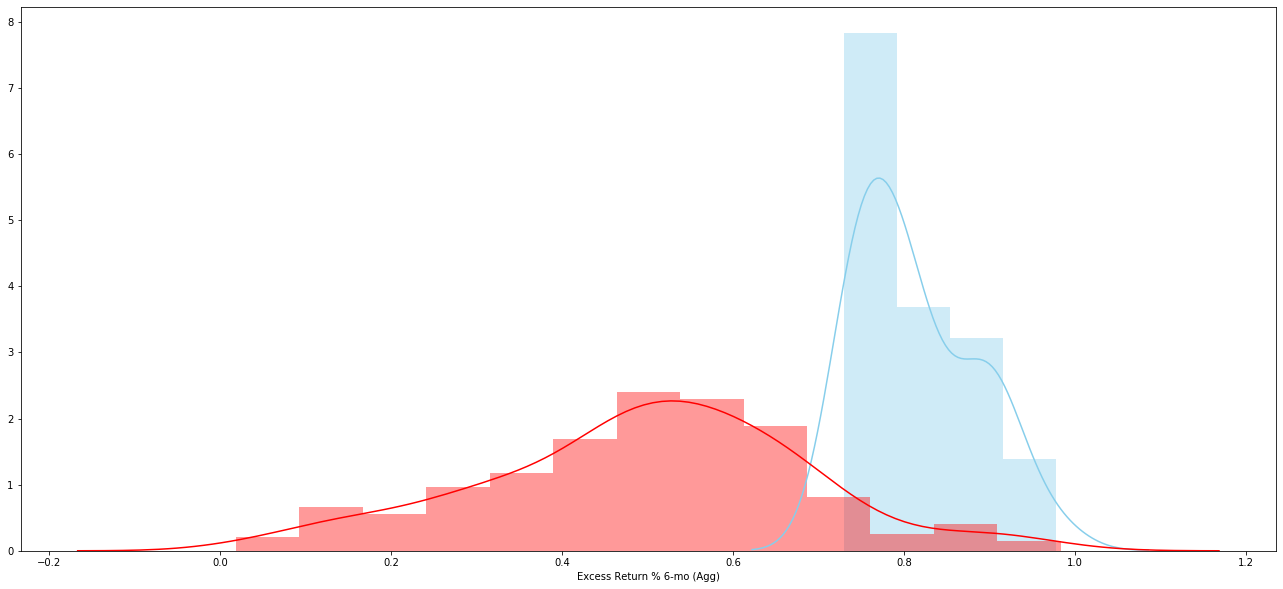

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 9-mo (Treasury)  272.0  0.503700  0.219842  0.013330   
 2                         combined  307.0  0.539049  0.230376  0.013148   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.477457  0.529943  
 2   0.513177  0.564922  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.3101
 1                              Degrees of freedom =   305.0000
 2                                               t =     8.2812
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4871
 7                                       Hedge's g =     1.4835
 8           

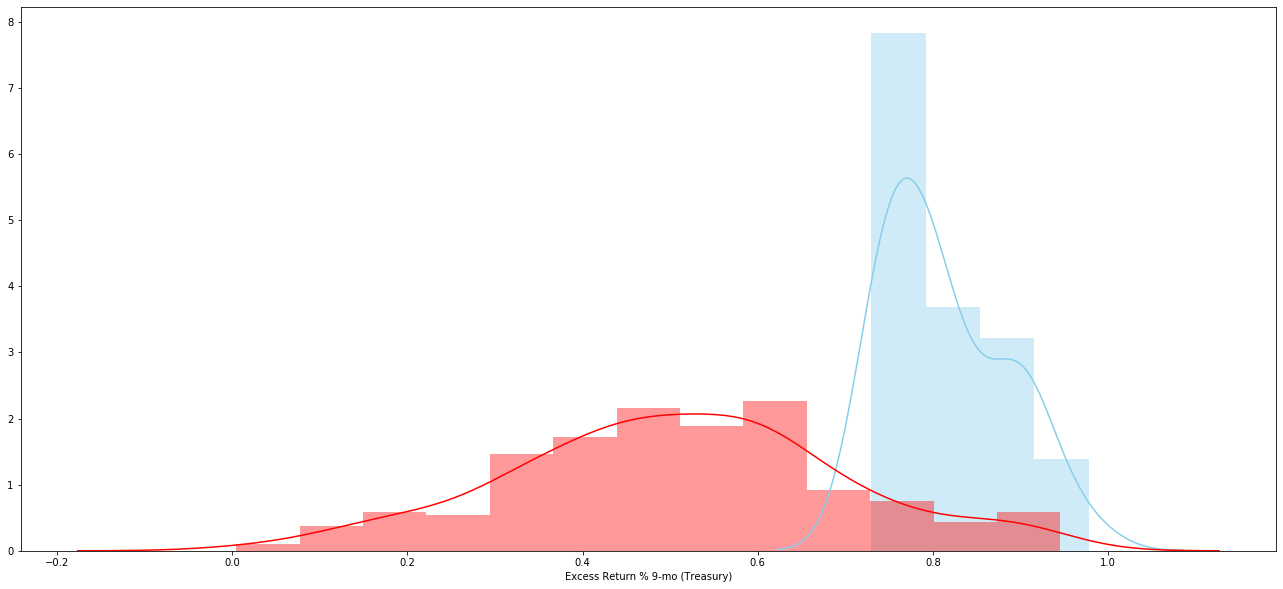

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   35.0  0.813764  0.068938  0.011653   0.790083   
 1  Excess Return % 9-mo (Agg)  272.0  0.504949  0.208194  0.012624   0.480096   
 2                    combined  307.0  0.540156  0.220407  0.012579   0.515403   
 
    Interval  
 0  0.837445  
 1  0.529802  
 2  0.564909  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.3088
 1                             Degrees of freedom =   305.0000
 2                                              t =     8.7032
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5629
 7                                      Hedge's g =     1.5590
 8                                  Glass'

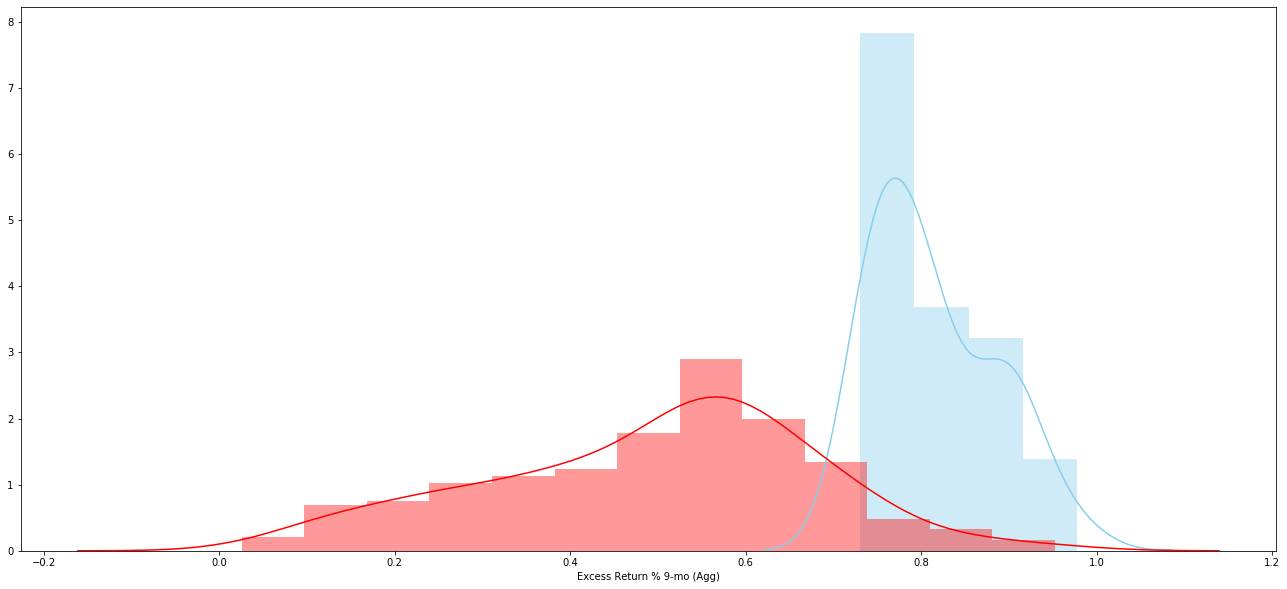

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 12-mo (Treasury)  269.0  0.512186  0.221212  0.013488   
 2                          combined  304.0  0.546907  0.230460  0.013218   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.485631  0.538741  
 2   0.520897  0.572918  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.3016
 1                              Degrees of freedom =   302.0000
 2                                               t =     8.0046
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4384
 7                                       Hedge's g =     1.4348
 8       

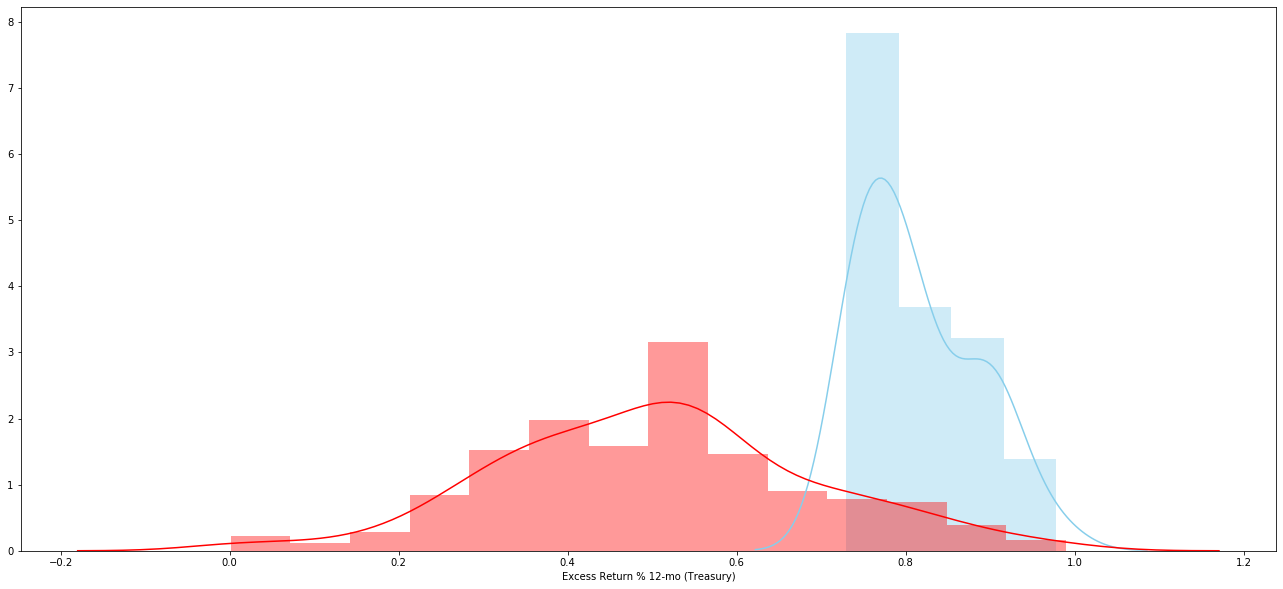

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 12-mo (Agg)  269.0  0.511790  0.200958  0.012253   
 2                     combined  304.0  0.546557  0.213479  0.012244   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.487666  0.535914  
 2   0.522463  0.570651  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.3020
 1                              Degrees of freedom =   302.0000
 2                                               t =     8.8116
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5834
 7                                       Hedge's g =     1.5794
 8                           

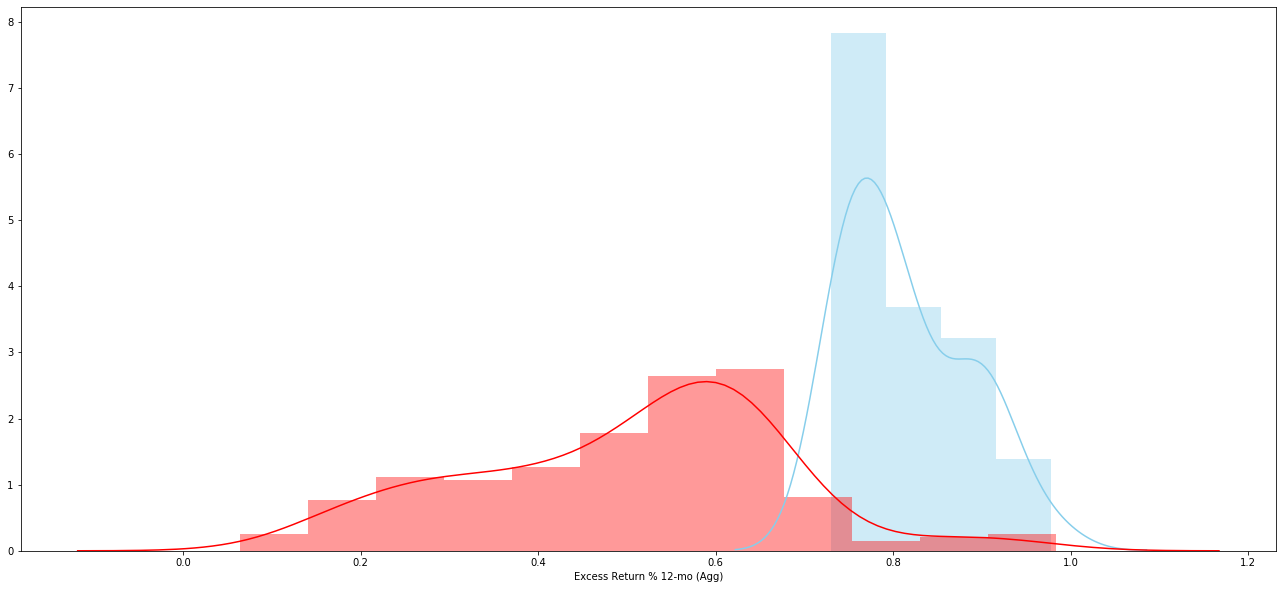

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 24-mo (Treasury)  257.0  0.495789  0.224305  0.013992   
 2                          combined  292.0  0.533902  0.235627  0.013789   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.468235  0.523342  
 2   0.506763  0.561041  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.3180
 1                              Degrees of freedom =   290.0000
 2                                               t =     8.3221
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4994
 7                                       Hedge's g =     1.4955
 8       

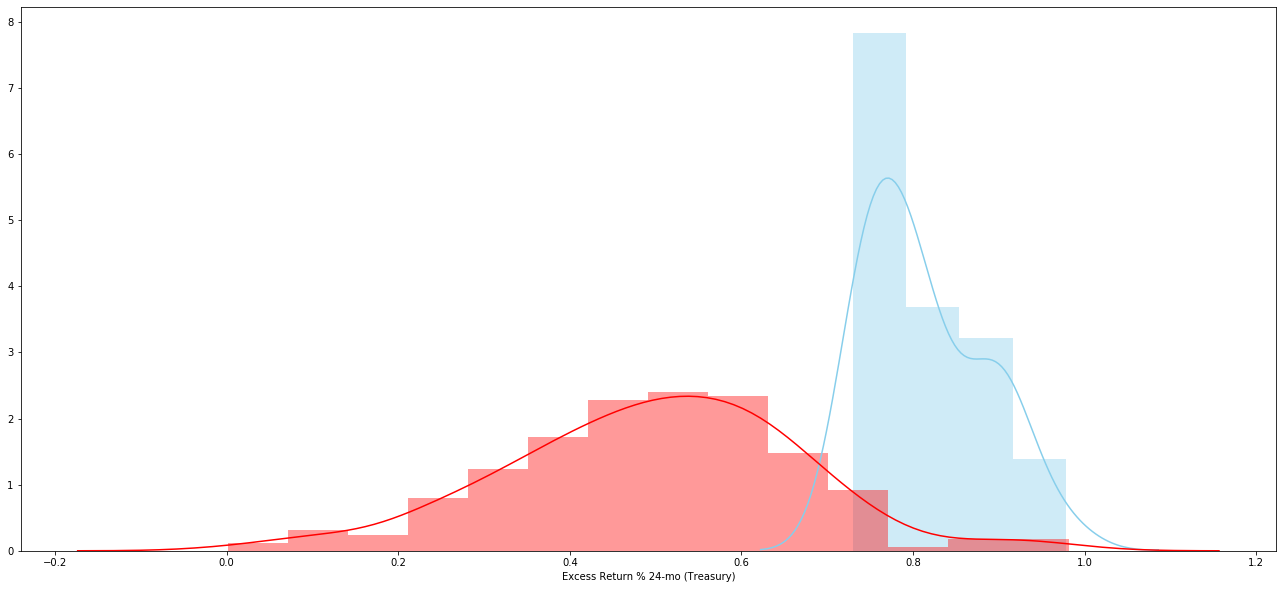

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 24-mo (Agg)  257.0  0.445458  0.213694  0.013330   
 2                     combined  292.0  0.489605  0.234707  0.013735   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.419208  0.471708  
 2   0.462572  0.516637  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3683
 1                              Degrees of freedom =   290.0000
 2                                               t =    10.1117
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.8219
 7                                       Hedge's g =     1.8171
 8                           

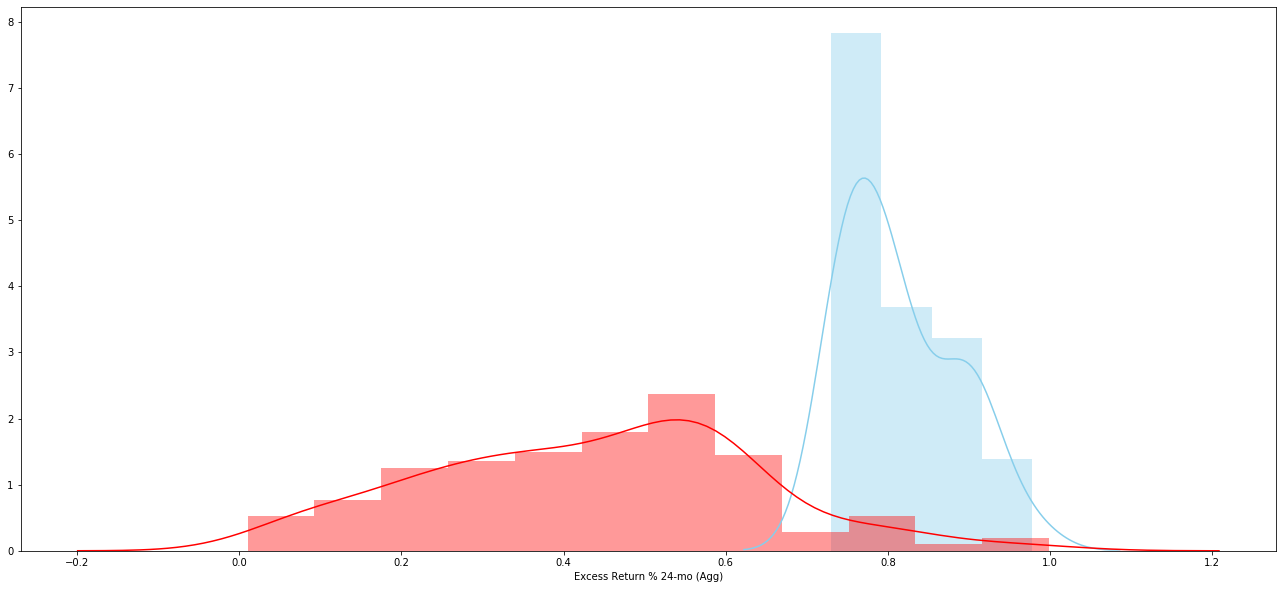

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 36-mo (Treasury)  245.0  0.497647  0.242868  0.015516   
 2                          combined  280.0  0.537162  0.251264  0.015016   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.467084  0.528210  
 2   0.507603  0.566721  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.3161
 1                              Degrees of freedom =   278.0000
 2                                               t =     7.6457
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3816
 7                                       Hedge's g =     1.3779
 8       

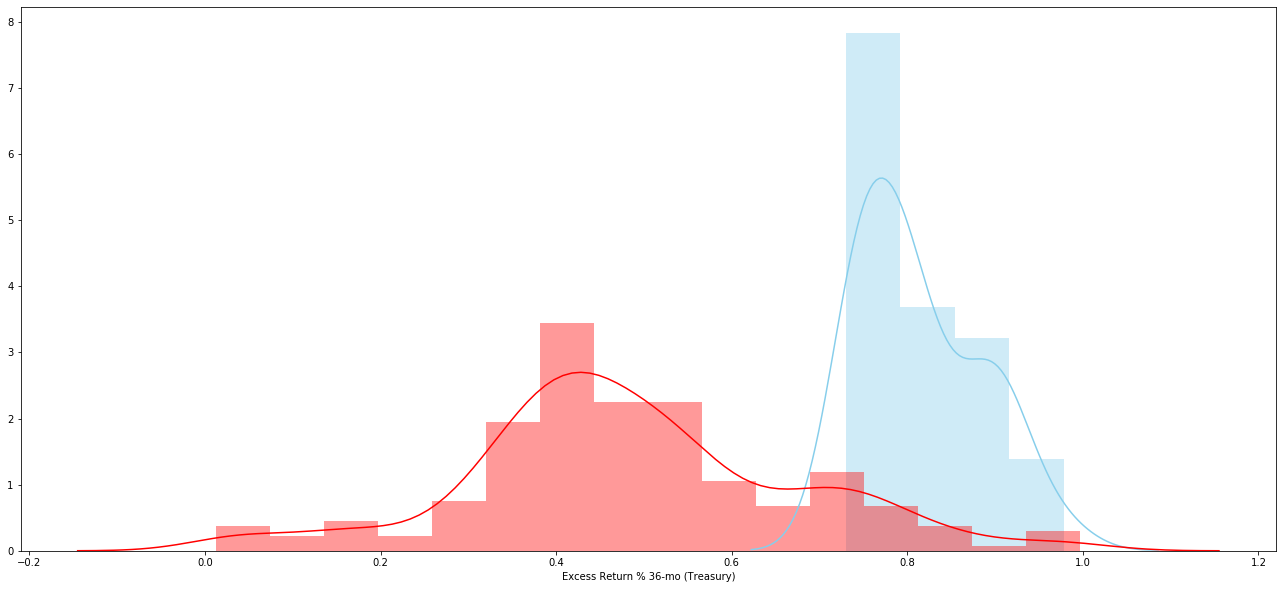

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   35.0  0.813764  0.068938  0.011653   
 1  Excess Return % 36-mo (Agg)  245.0  0.458988  0.201318  0.012862   
 2                     combined  280.0  0.503335  0.223248  0.013342   
 
    95% Conf.  Interval  
 0   0.790083  0.837445  
 1   0.433654  0.484323  
 2   0.477072  0.529599  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3548
 1                              Degrees of freedom =   278.0000
 2                                               t =    10.3256
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.8659
 7                                       Hedge's g =     1.8608
 8                           

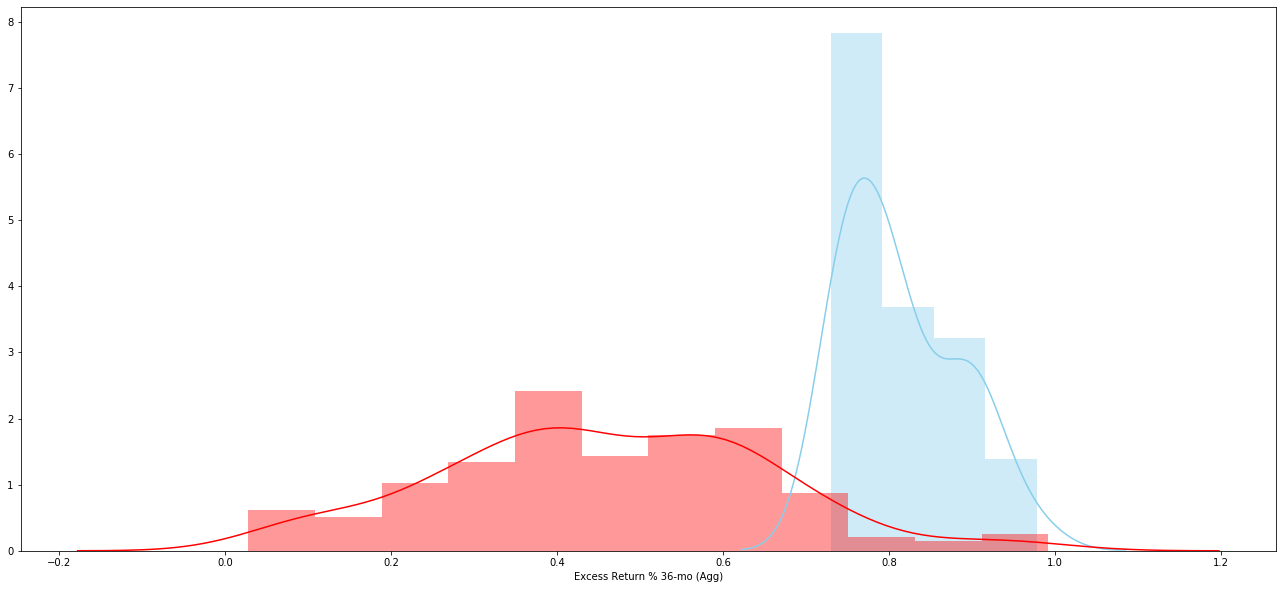

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")